In [1]:
from keras import optimizers
import tensorflow as tf
from keras.layers import Input, Lambda, Dense, Flatten,GlobalAveragePooling2D,BatchNormalization,Dropout
from keras.models import Model
from keras.applications.vgg16 import VGG16 #VGG16
from keras.applications.vgg16 import preprocess_input #the input data is processed in the same way that the VGG16 model was trained on ImageNet data
# It scales the pixel values by a factor (usually 1/255) to normalize the input data to the [0, 1] range
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
from keras import layers

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224] #to pass into vgg16 we need to use 224*224

In [4]:
train_path = r'C:\Users\Mohamed Arshad\Downloads\archive(2)\chest_xray\train'
test_path = r'C:\Users\Mohamed Arshad\Downloads\archive(2)\chest_xray\test'

In [5]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) #False -custom image classification problem or using it for object detection, image segmentation, or any other task where you want to leverage the pre-trained convolutional layers while adding your own custom layers on top.

In [6]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [7]:
  # useful for getting number of classes
folders = glob('C:/Users/Mohamed Arshad/Downloads/archive(2)/chest_xray/train/*')

In [8]:
print(len(folders))

2


In [9]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='relu')(x)

In [10]:
# create a model object
#model = Model(inputs=vgg.input, outputs=prediction)

In [11]:
vgg = Sequential([
        vgg,
        GlobalAveragePooling2D(),#used for feature extraction takes average and gives single value of 1*1,it also prevents overfitting
        Dense(512, activation="relu"),
        BatchNormalization(),#it normalises the previous layer with mean close to o and standard deviation of 1
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])

In [12]:
opt = optimizers.Adam(learning_rate=0.001)
METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]

In [13]:

# view the structure of the model
vgg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               6

In [14]:
# tell the model what cost and optimization method to use
vgg.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=METRICS
)

In [15]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [16]:
# fit the model
r = vgg.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=1,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\Mohamed Arshad\AppData\Local\Temp\ipykernel_18512\3361455661.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = vgg.fit_generator(


163/163 [==============================] - 459s 3s/step - loss: 0.3749 - accuracy: 0.8495 - precision: 0.9478 - recall: 0.8439 - val_loss: 0.7852 - val_accuracy: 0.6330 - val_precision: 0.6300 - val_recall: 1.0000


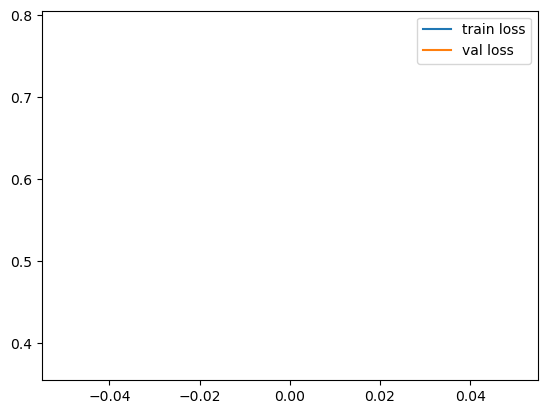

<Figure size 640x480 with 0 Axes>

In [17]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

In [18]:
r.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])

In [19]:
r.history['accuracy']

[0.8495015501976013]

In [20]:
r.history['val_accuracy']

[0.6330128312110901]

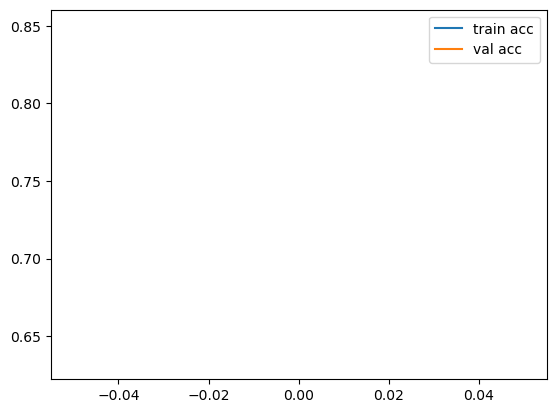

<Figure size 640x480 with 0 Axes>

In [21]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:
import tensorflow as tf

# +
#from keras.models import load_model
# -

# model.save('facefeatures_new_model.h5')